### Import data and packages

In [46]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

data_path = '../artifacts/'

In [47]:
df = pd.read_csv(data_path + 'raw.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### Explore data

In [48]:
# Check for missing values
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [49]:
# Check for duplicates
df.duplicated().sum()

0

In [50]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [51]:
# Number of unique values
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [52]:
# Statistics of features
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

### Data cleaning

In [53]:
replace_map = {0: 'No', 1: 'Yes'}
features_to_replace = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df[features_to_replace] = df[features_to_replace].replace(replace_map)
df.head()

battery_power blue  clock_speed dual_sim  fc four_g  int_memory  m_dep  \
0            842   No          2.2       No   1     No           7    0.6   
1           1021  Yes          0.5      Yes   0    Yes          53    0.7   
2            563  Yes          0.5      Yes   2    Yes          41    0.9   
3            615  Yes          2.5       No   0     No          10    0.8   
4           1821  Yes          1.2       No  13    Yes          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g touch_screen wifi price_range  
0       No           No  Yes           1  
1      Yes          Yes   No           2  
2      Yes          Yes   No           2  
3      Yes           No   No           2  
4      Yes          Yes   No           1  

[5 rows x 21 columns]

In [54]:
df.to_csv(data_path + 'interim.csv', index=False)

### Visualizations

In [55]:
df = pd.read_csv(data_path + 'interim.csv')
df.head()

battery_power blue  clock_speed dual_sim  fc four_g  int_memory  m_dep  \
0            842   No          2.2       No   1     No           7    0.6   
1           1021  Yes          0.5      Yes   0    Yes          53    0.7   
2            563  Yes          0.5      Yes   2    Yes          41    0.9   
3            615  Yes          2.5       No   0     No          10    0.8   
4           1821  Yes          1.2       No  13    Yes          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g touch_screen wifi price_range  
0       No           No  Yes           1  
1      Yes          Yes   No           2  
2      Yes          Yes   No           2  
3      Yes           No   No           2  
4      Yes          Yes   No           1  

[5 rows x 21 columns]

In [56]:
features = df.columns

def  univ_plot(data, feature, size=20):
    plt.figure(figsize=(10,4))
    
    if data[feature].nunique() > size:
        plt.subplot(1,2,1)
        sns.histplot(data=data, x=feature, kde=True)
        plt.title(f'Histogram - {feature}')

        plt.subplot(1,2,2)
        sns.boxplot(data=data, x=feature)
        plt.title(f'Boxplot - {feature}')
    else:
        sns.countplot(data=data, x=feature)
        plt.title(f'Countplot - {feature}')

    plt.show()

def biv_plot(data, feature, target='price_range', size=20):
    plt.figure(figsize=(10,4))
    
    if feature == target: return
    if data[feature].nunique() > size:
        sns.boxplot(data=data, x=feature, hue=target)
        plt.title(f'Boxplot - {feature} by {target}')
    else:
        sns.countplot(data=data, x=feature, hue=target)
        plt.title(f'Countplot - {target} by {feature}')

    plt.show()

def multiv_plot(data, vars, target='price_range'):
    plt.figure(figsize=(10,4))
    sns.pairplot(data=data, vars=vars, hue='price_range')
    plt.suptitle(f'Features:{vars} by price', y=1.02)
    plt.show()

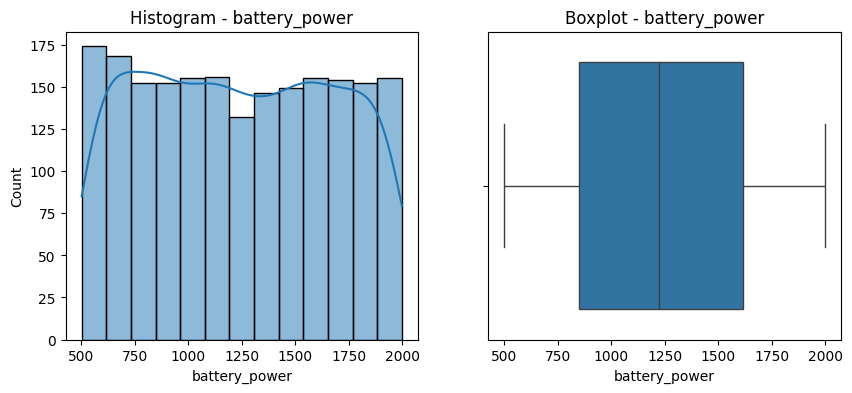

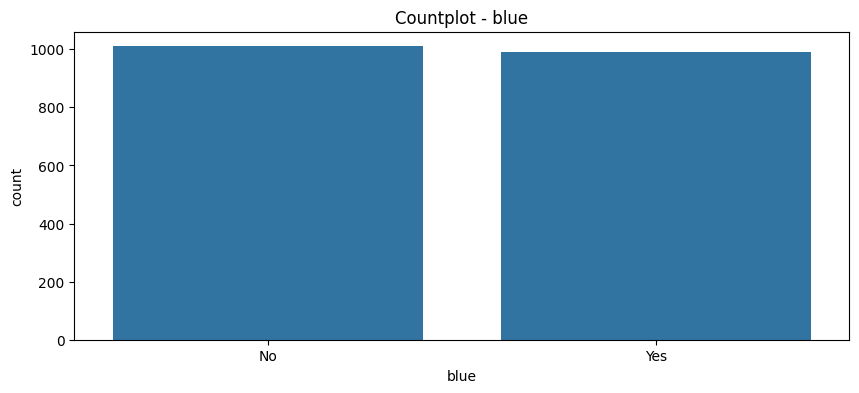

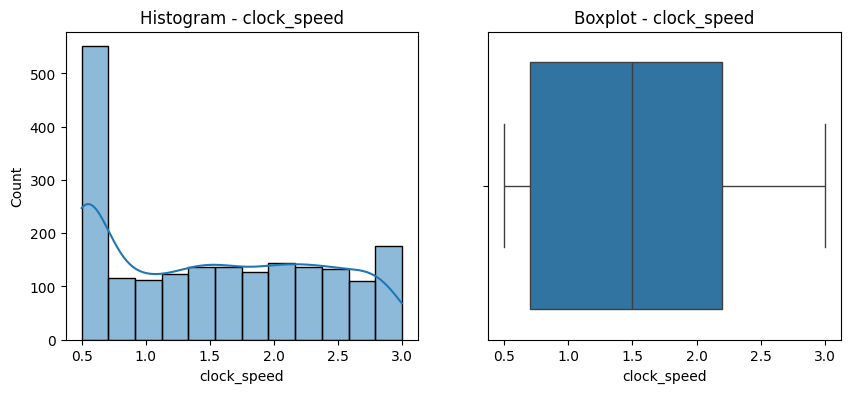

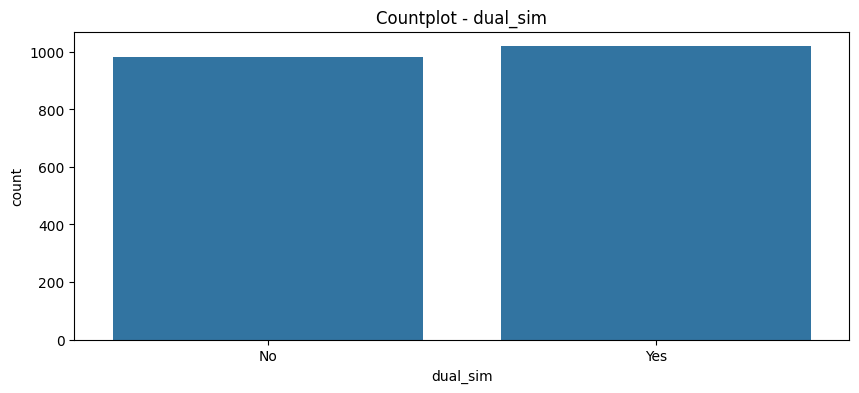

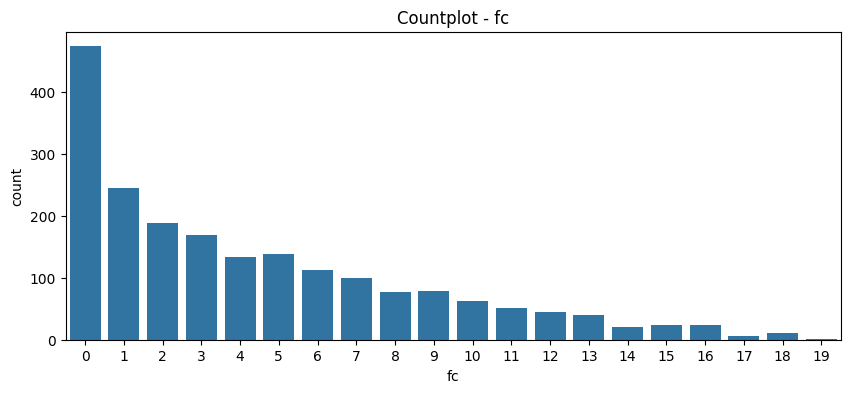

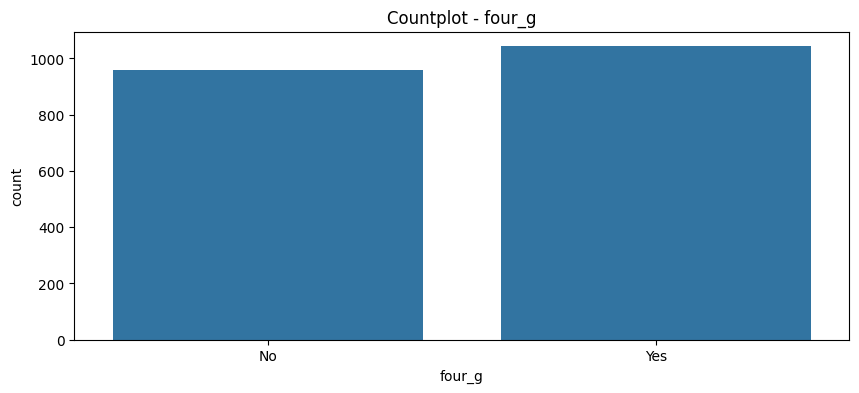

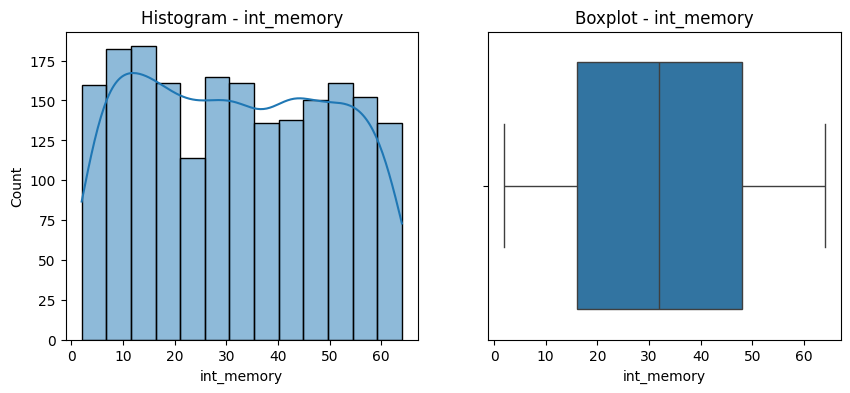

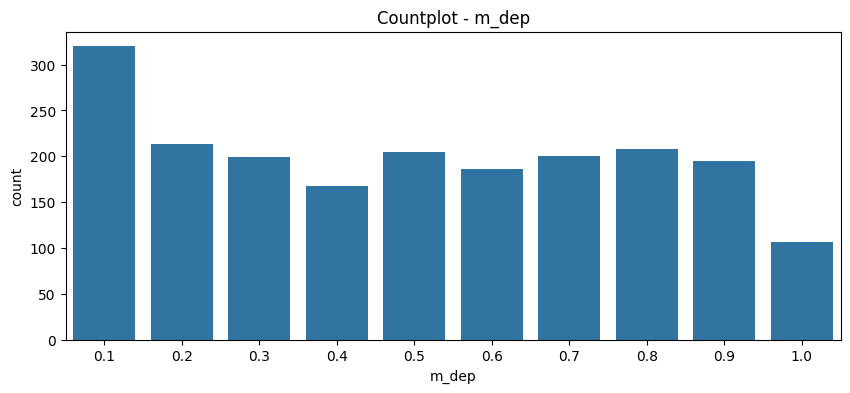

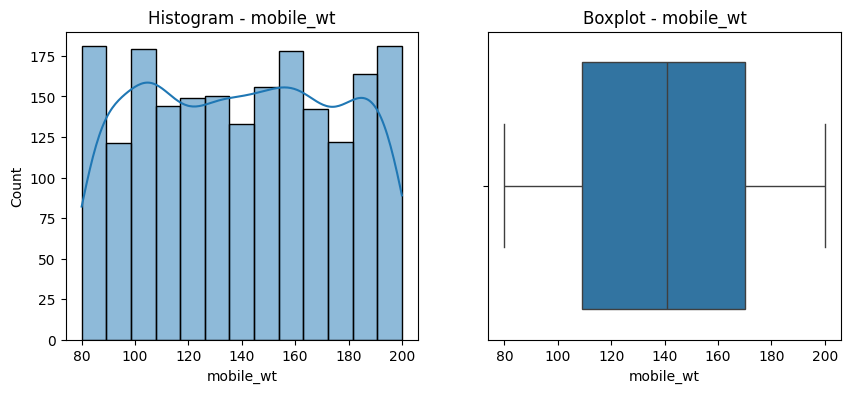

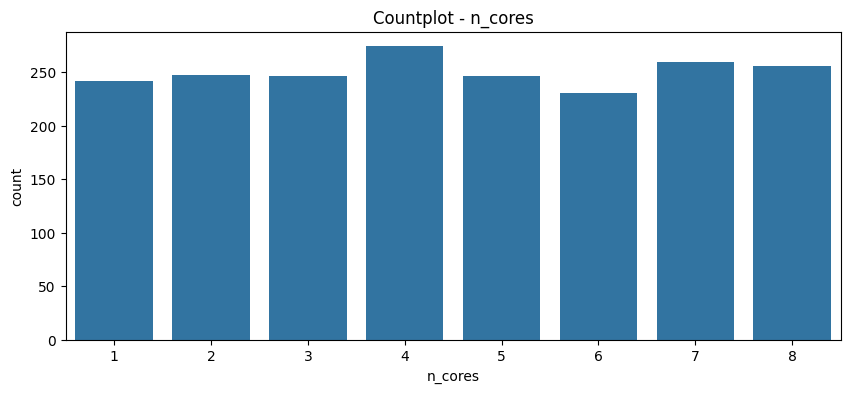

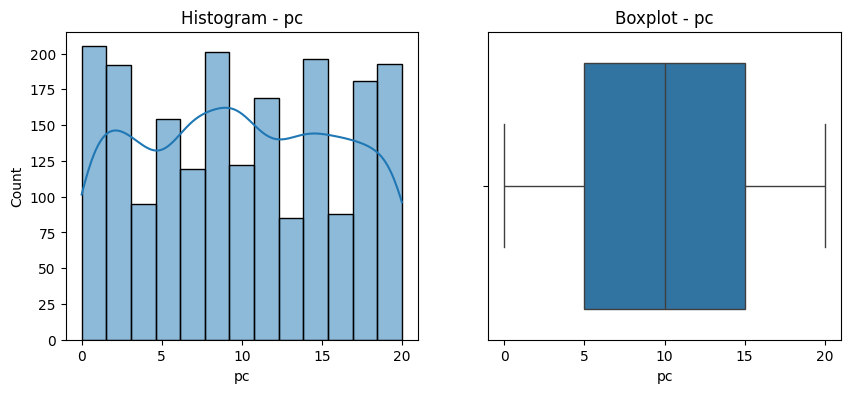

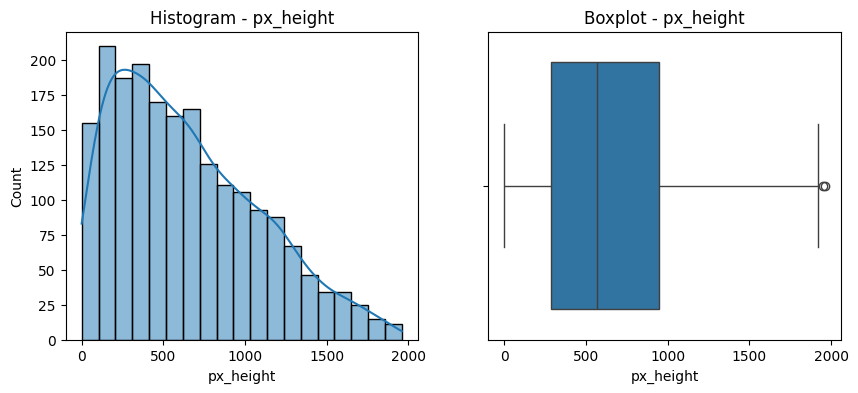

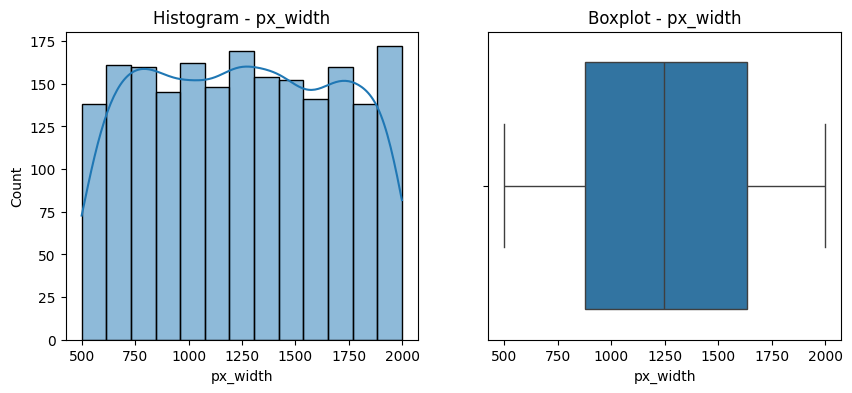

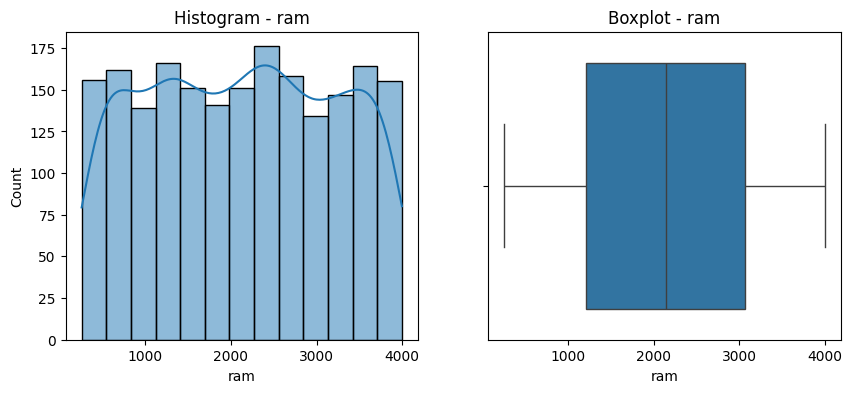

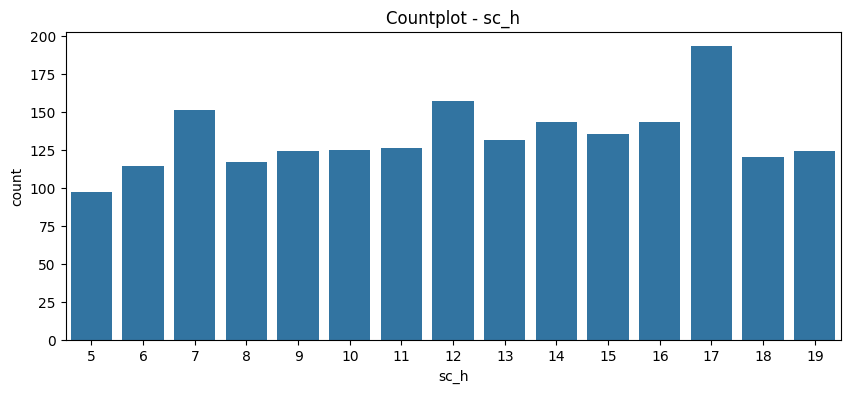

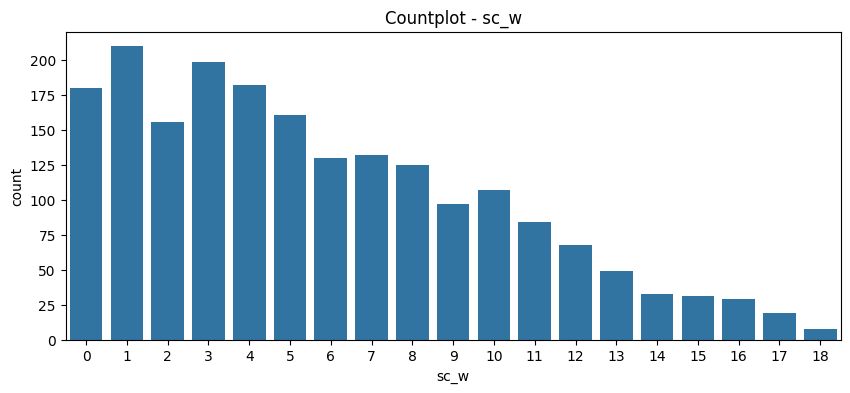

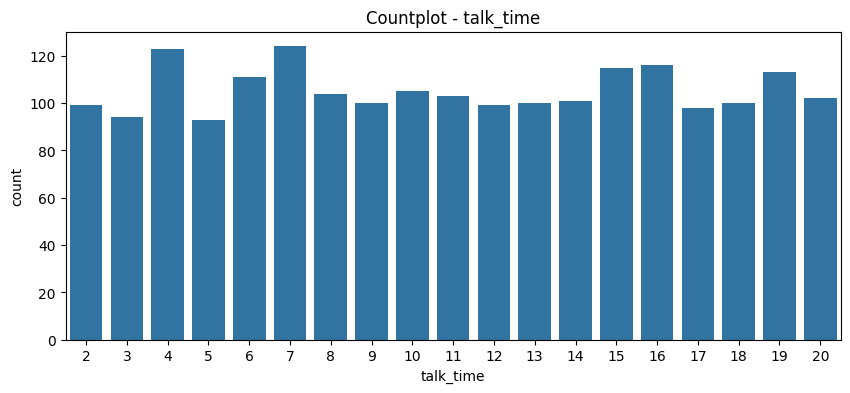

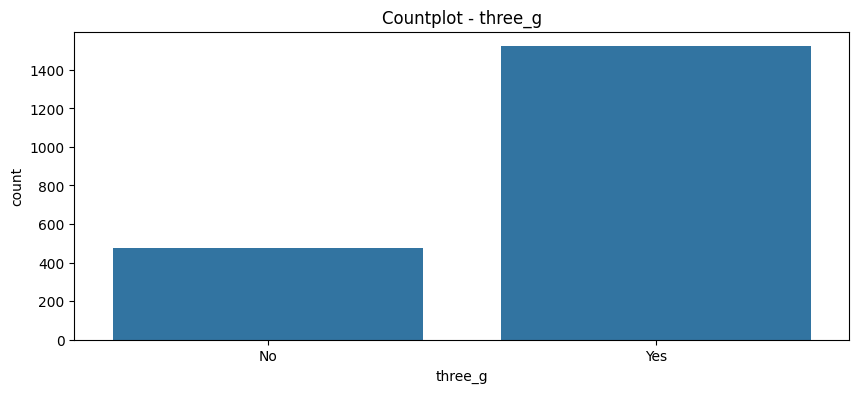

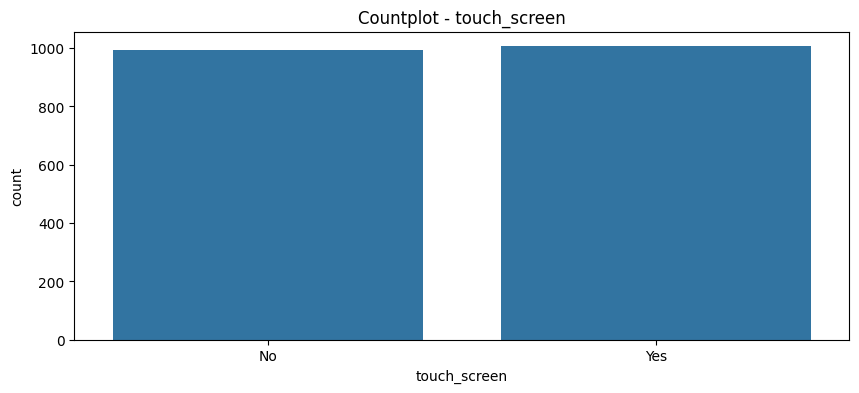

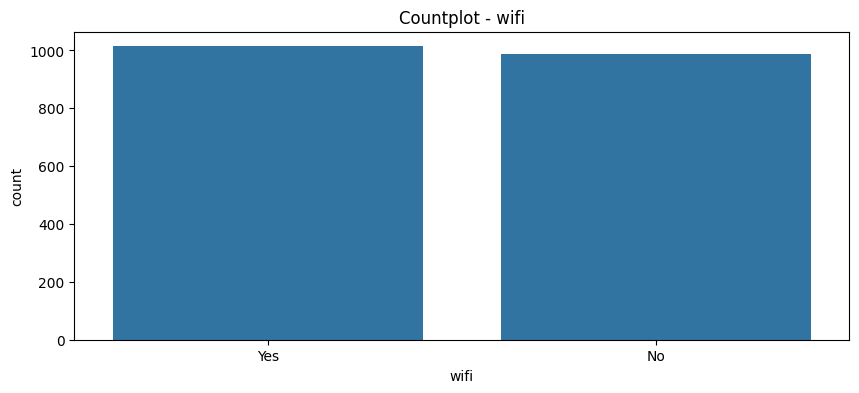

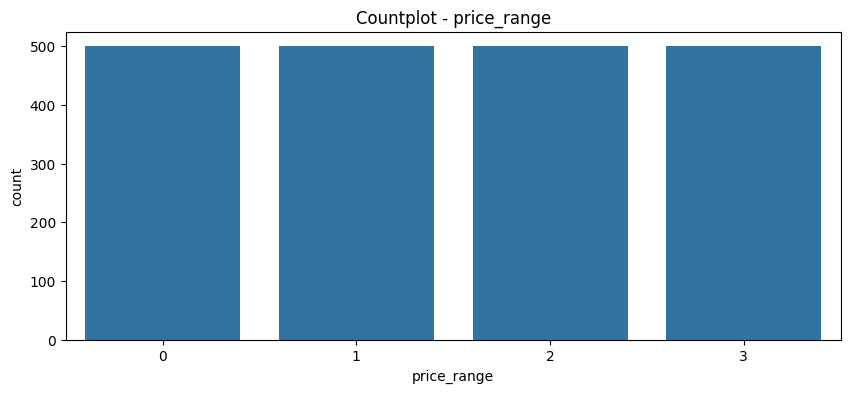

In [57]:
# Univariate analysis
for feature in features:
    univ_plot(df, feature)

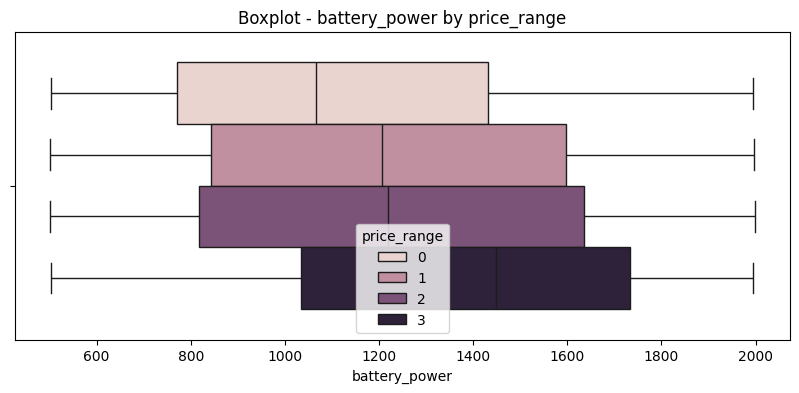

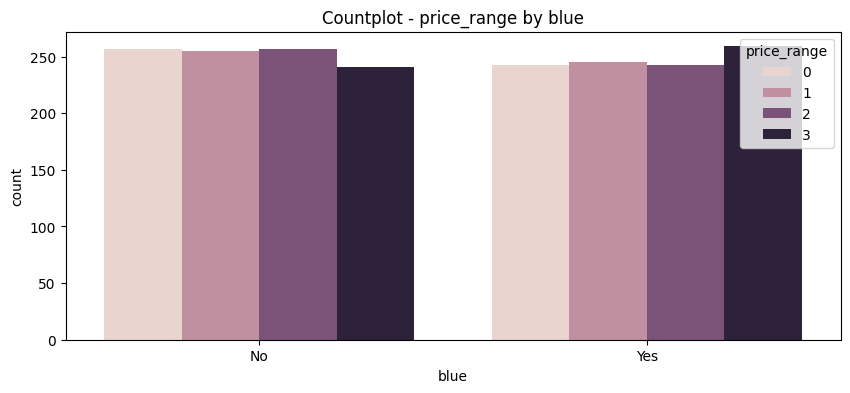

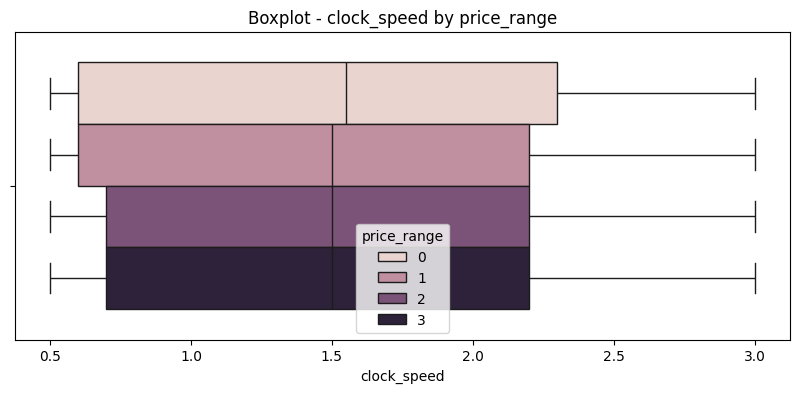

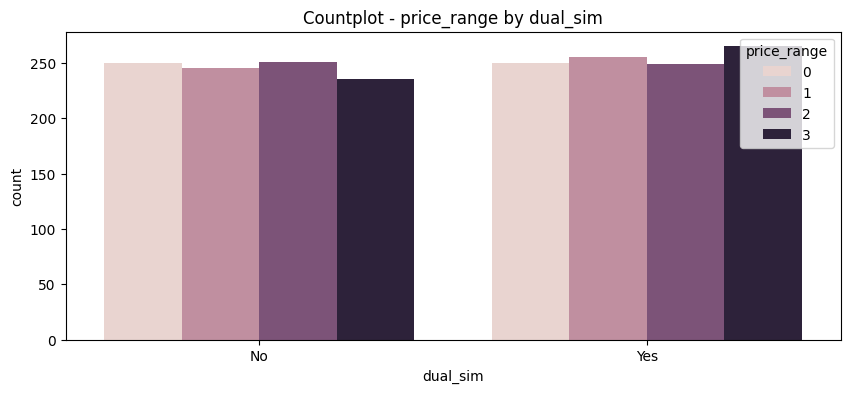

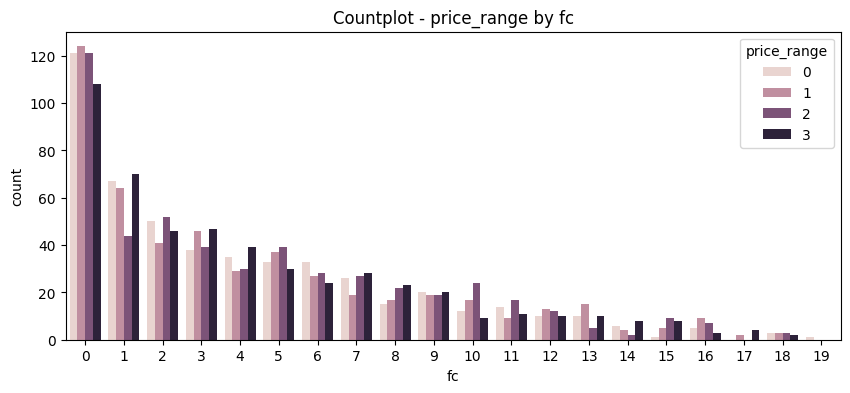

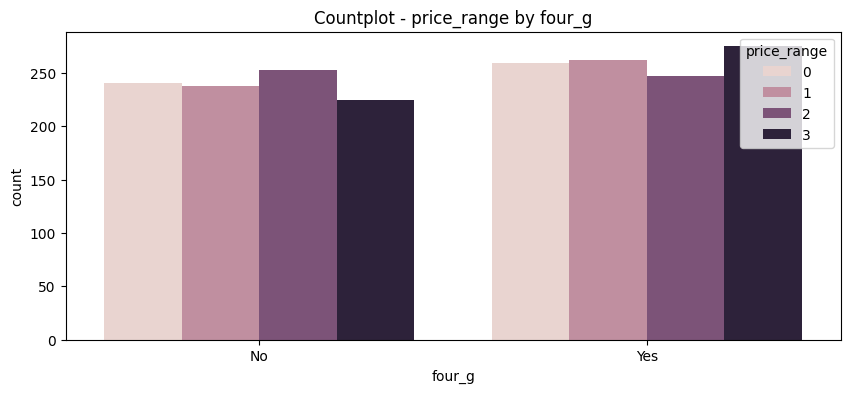

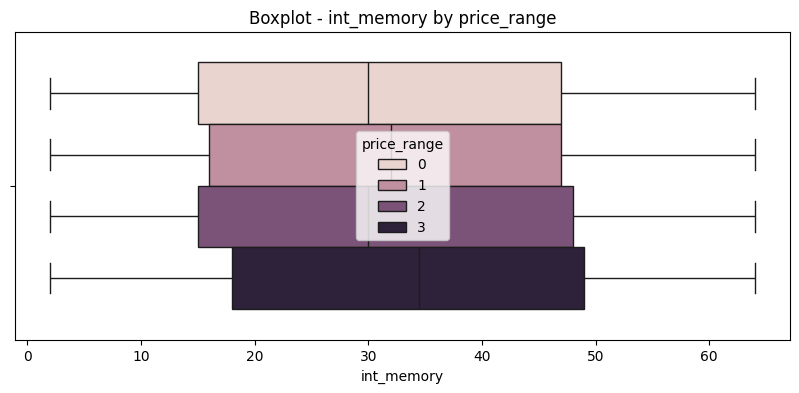

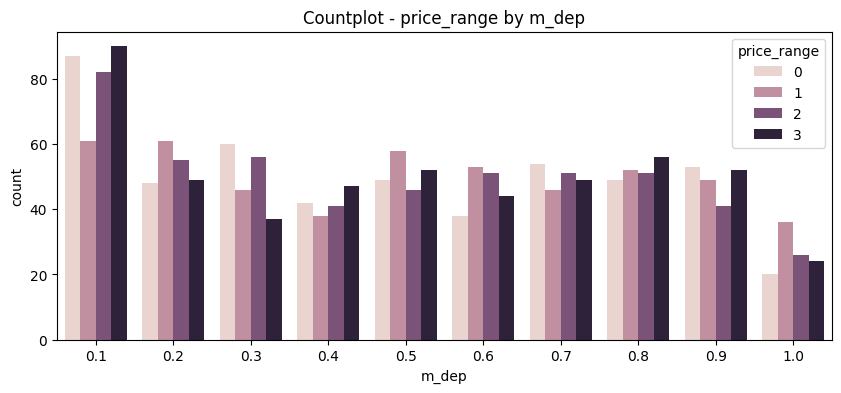

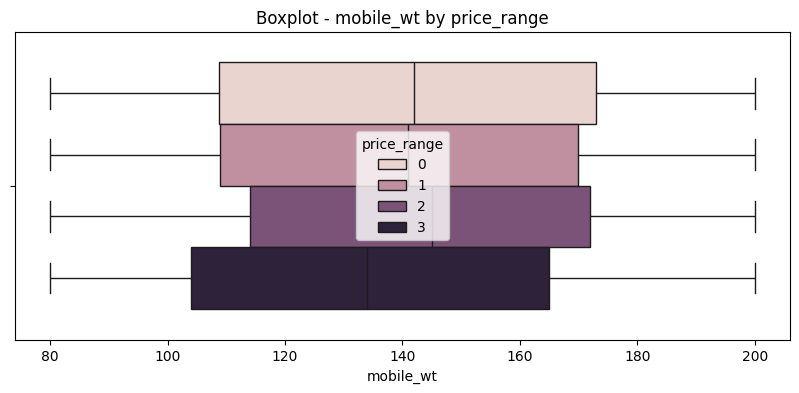

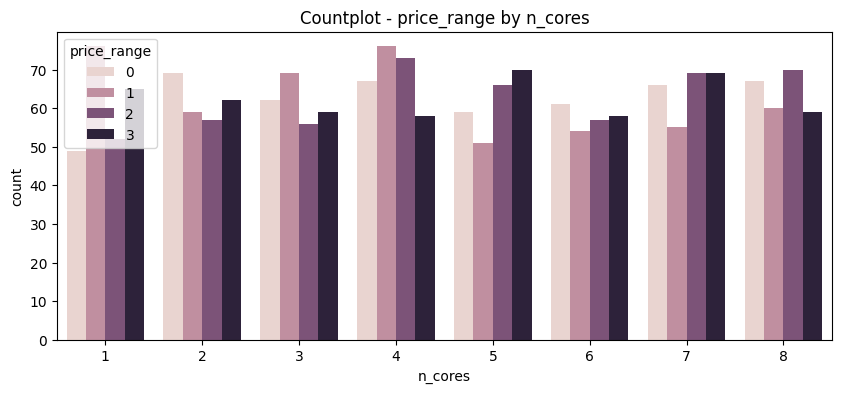

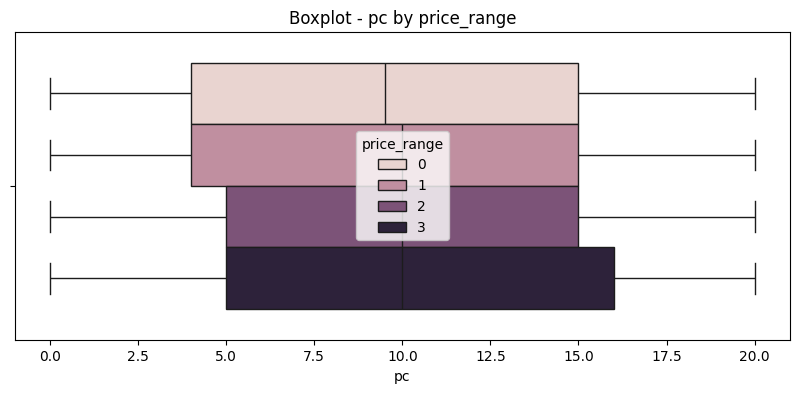

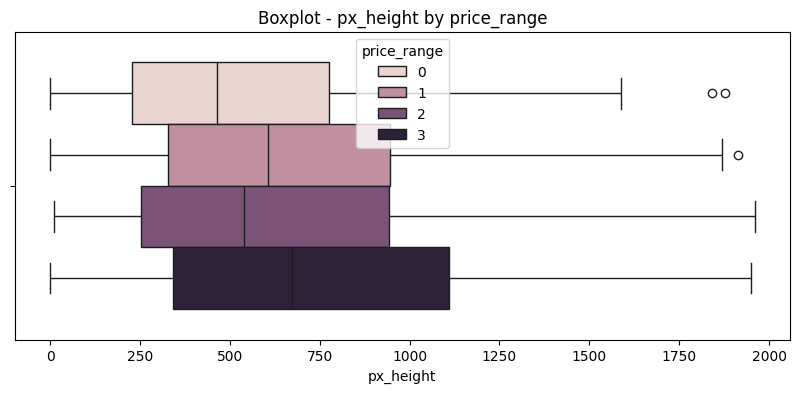

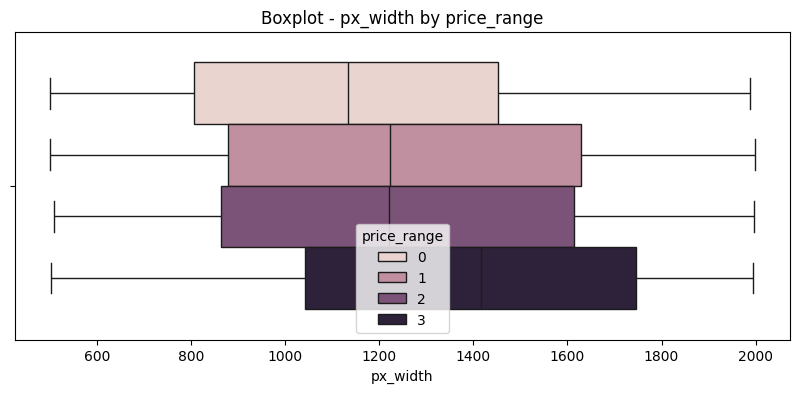

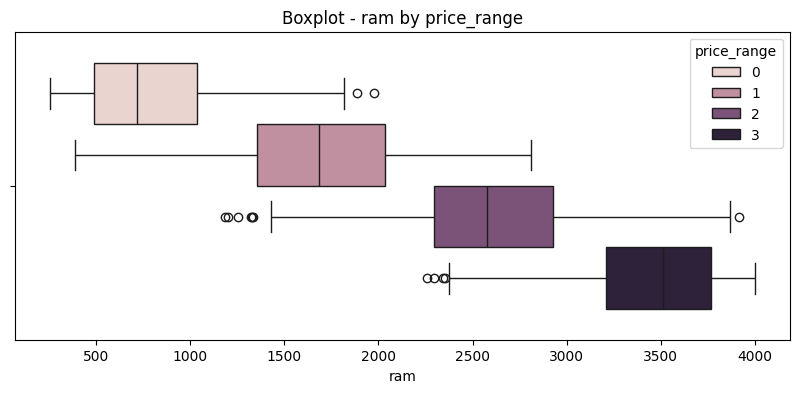

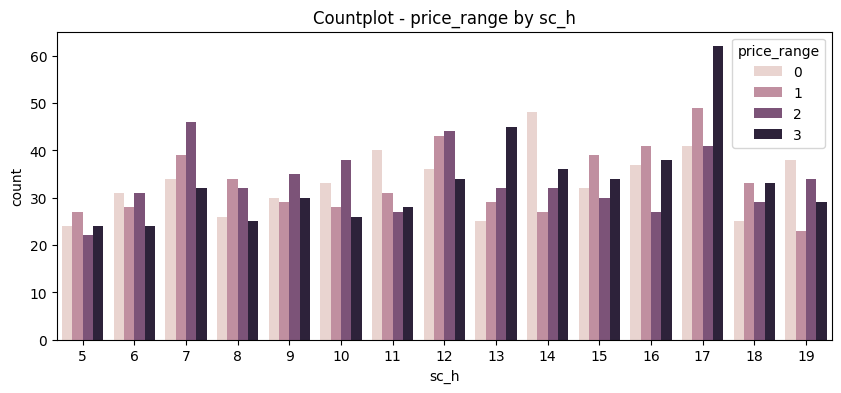

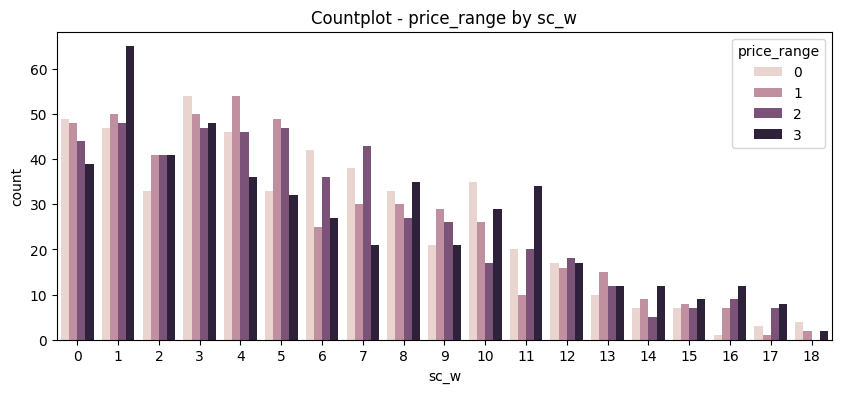

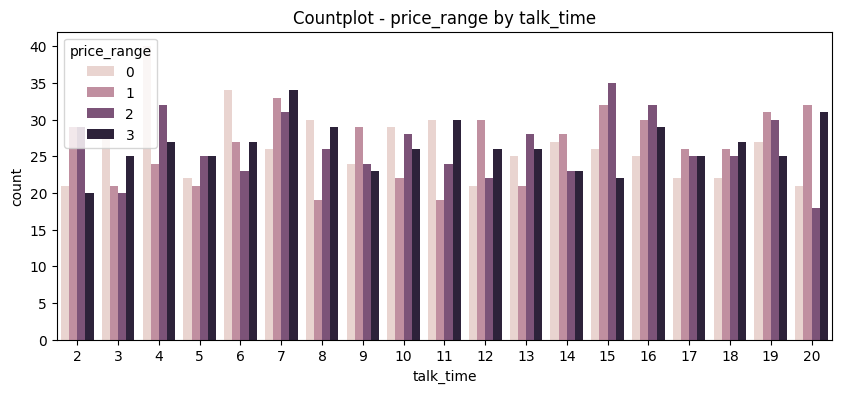

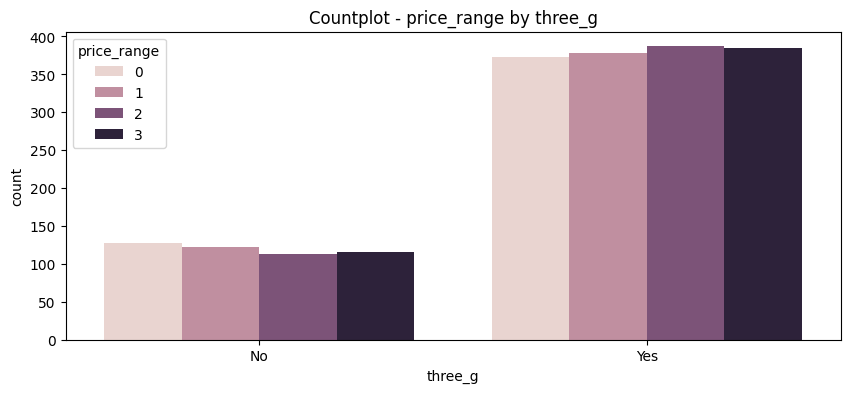

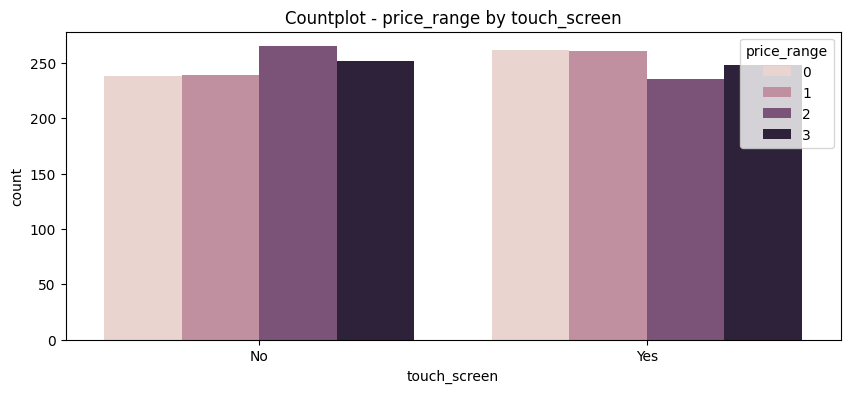

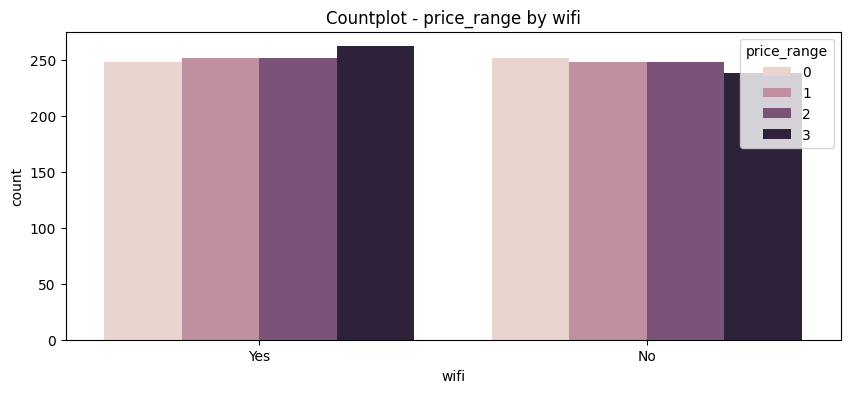

<Figure size 1000x400 with 0 Axes>

In [58]:
# Bivariate analysis
for feature in features:
    biv_plot(df, feature)

<Figure size 1000x400 with 0 Axes>

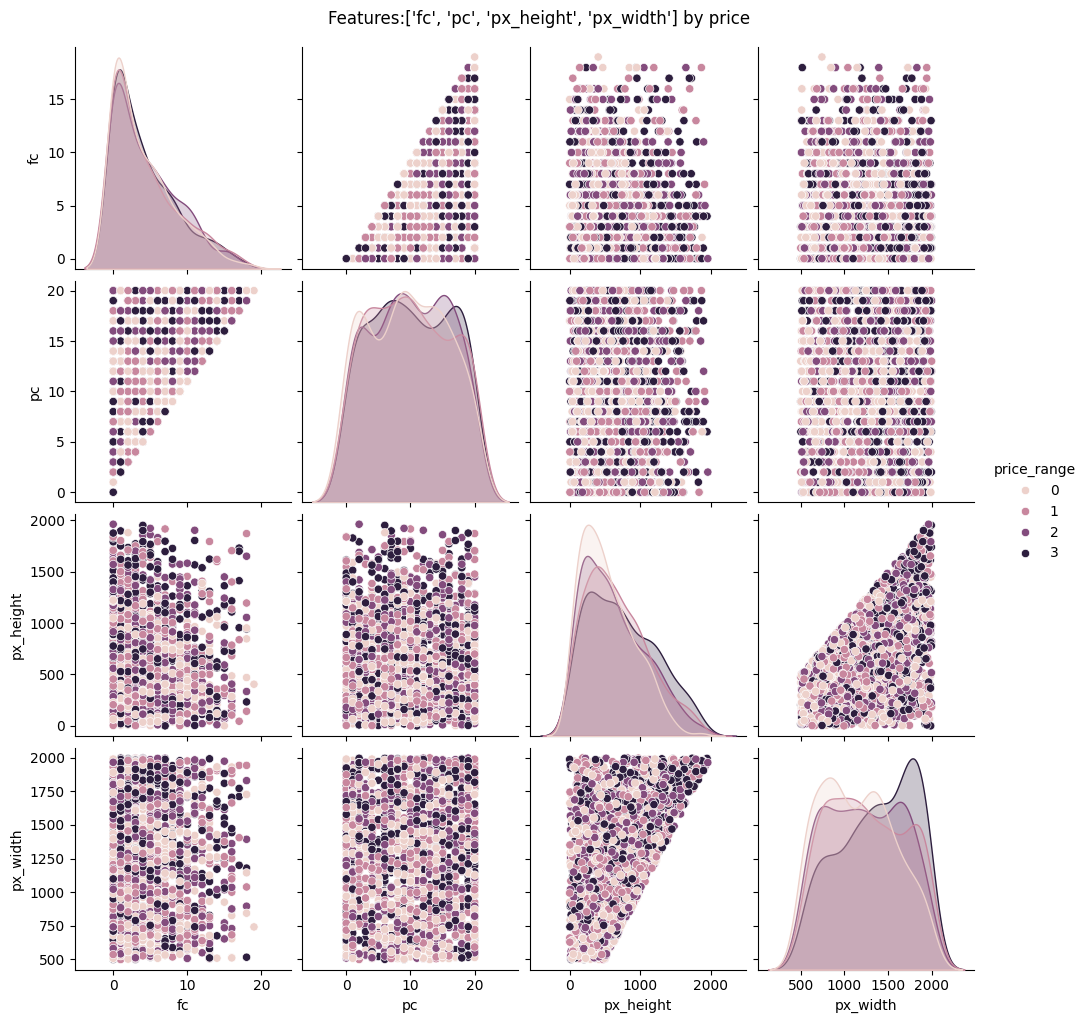

<Figure size 1000x400 with 0 Axes>

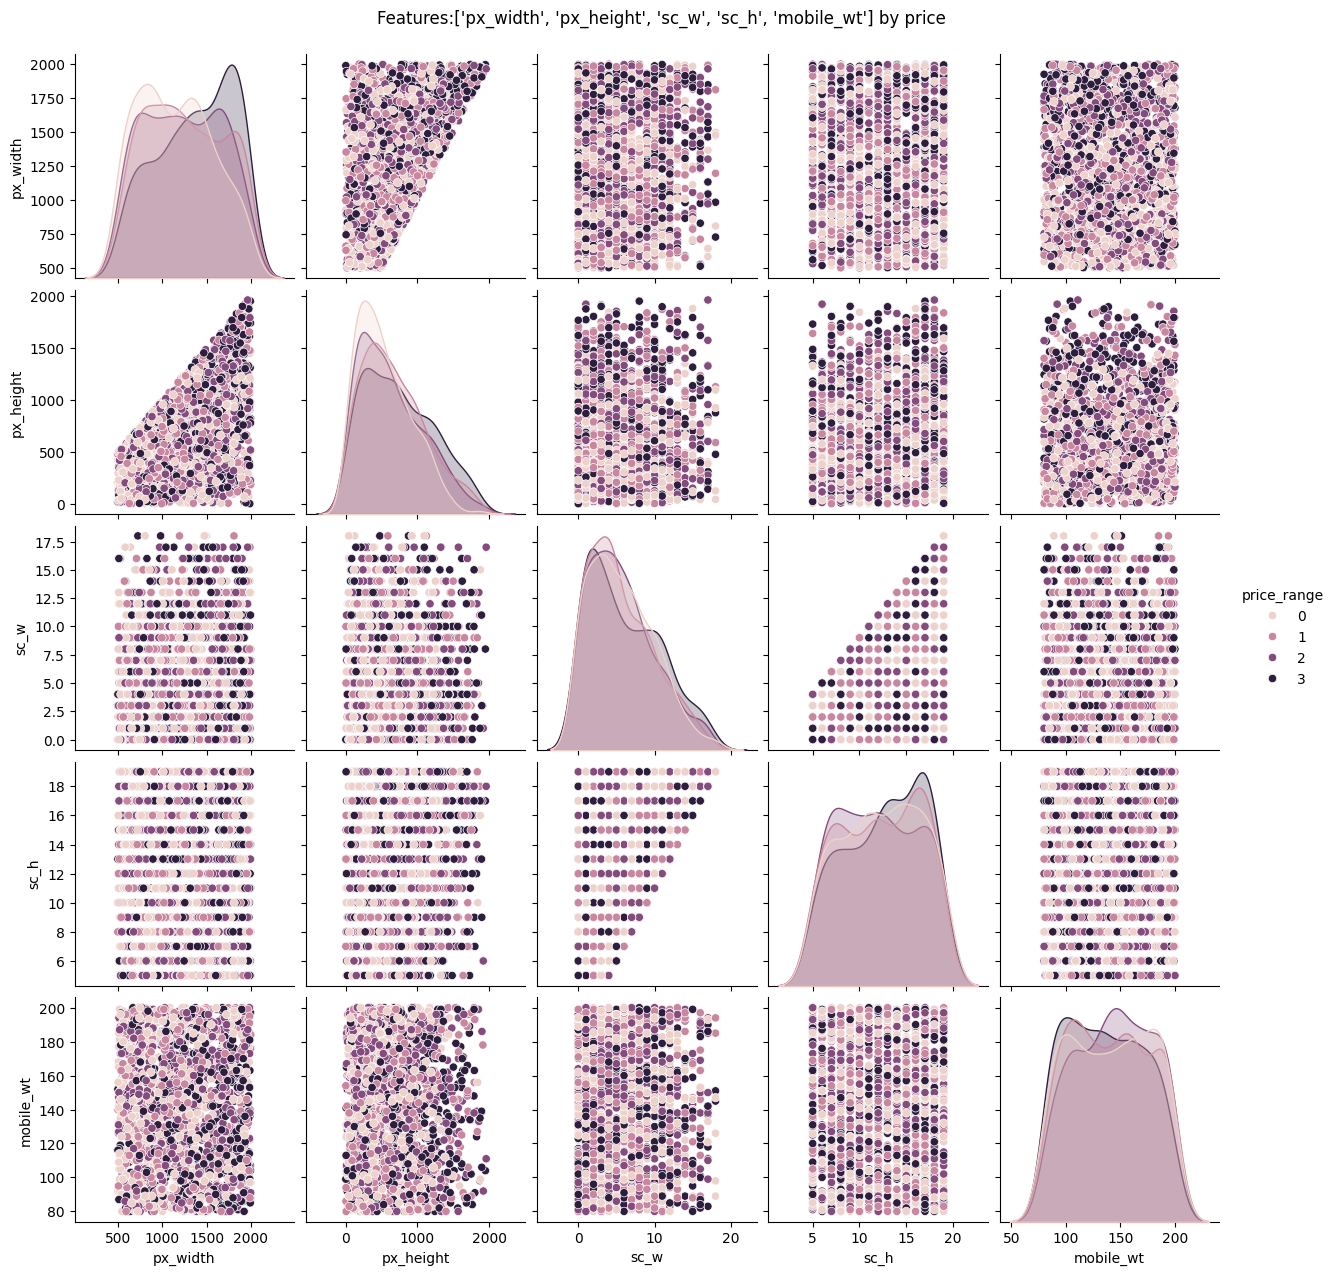

<Figure size 1000x400 with 0 Axes>

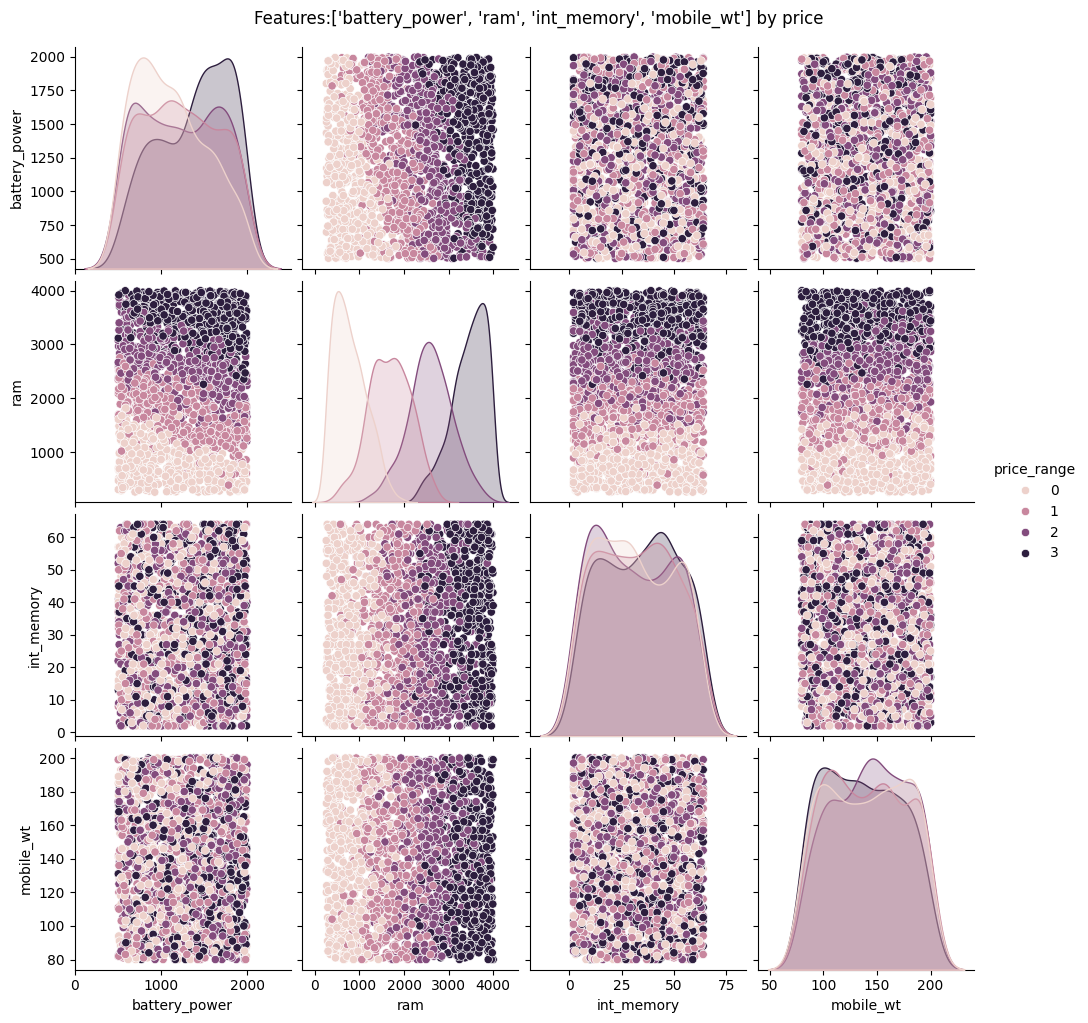

In [59]:
# Multivariate analysis

### Front Camera, Rear Camera, Pixel Height, Pixel Width by Price Range
features = ['fc', 'pc', 'px_height', 'px_width']
multiv_plot(df,features)

### Pixel Width, Pixel Height, Screen Width, Screen Height, Mobile Weight by Price Range
features = ['px_width', 'px_height', 'sc_w', 'sc_h', 'mobile_wt']
multiv_plot(df,features)

### Battery Power, RAM, Internal Memory, Mobile Weight by Price range
features = ['battery_power', 'ram', 'int_memory', 'mobile_wt']
multiv_plot(df, features)

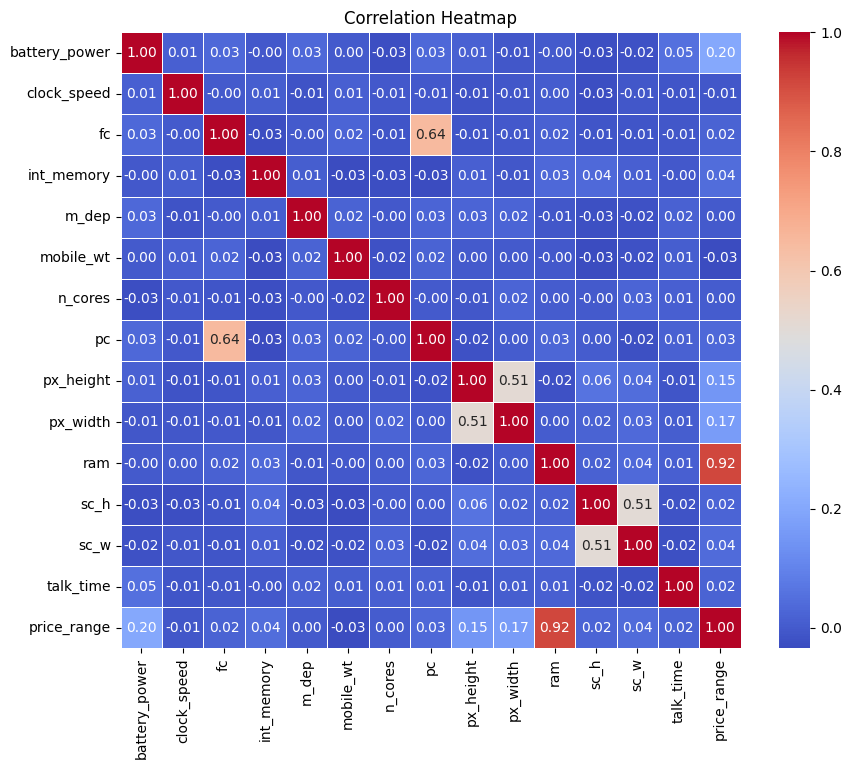

In [60]:
# Correlation
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Feature engineering

In [61]:
# Split data into X features and y target
df = pd.read_csv(data_path + 'interim.csv')
X = df.drop(columns=['price_range'])
y = df['price_range']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 20)
X_test shape: (400, 20)
y_train shape: (1600,)
y_test shape: (400,)


In [62]:
### Data preprocessing
num_features = X_train.select_dtypes(include='number').columns
cat_features = X_train.select_dtypes(include='object').columns

num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features)
    ],
    remainder='drop'
)

In [63]:
X_train_transformed_arr = preprocessor.fit_transform(X_train)
y_train_arr = np.array(y_train)
X_test_transformed_arr = preprocessor.transform(X_test)
y_test_arr = np.array(y_test)

In [64]:
# Save function
def save_data(path, filename, data):
    with open(os.path.join(path, filename), 'wb') as f:
        pickle.dump(data, f)

In [65]:
# Save preprocessor
save_data(data_path, 'preprocessor.pkl', preprocessor)

In [66]:
# Save data
save_data(data_path, 'X_train_transformed_arr.pkl', X_train_transformed_arr)
save_data(data_path, 'y_train_arr.pkl', y_train_arr)
save_data(data_path, 'X_test_transformed_arr.pkl', X_test_transformed_arr)
save_data(data_path, 'y_test_arr.pkl', y_test_arr)

### Train model

In [67]:
# Load the transformed data
def load_data(path, filename):
    with open(os.path.join(path, filename), 'rb') as f:
        return pickle.load(f)

In [68]:
X_train = load_data(data_path,'X_train_transformed_arr.pkl')
y_train = load_data(data_path,'y_train_arr.pkl')
X_test = load_data(data_path,'X_test_transformed_arr.pkl')
y_test = load_data(data_path,'y_test_arr.pkl')

In [69]:
# Create a dictionary with model names and models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting Machines (GBM)': GradientBoostingClassifier(),
    'Support Vector Machines (SVM)': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False)
}

In [70]:
def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = {}
        
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_model_score = f1_score(y_test, y_pred, average='micro')
        report[name] = test_model_score
    
    return report

In [71]:
model_report:dict = evaluate_models(
    X_train=X_train, y_train=y_train, 
    X_test=X_test, y_test=y_test,
    models=models
)

In [72]:
best_model_score = max(sorted(model_report.values()))
best_model_name = list(model_report.keys())[
    list(model_report.values()).index(best_model_score)
]

best_model = models[best_model_name]

In [73]:
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.96      1.00      0.98        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



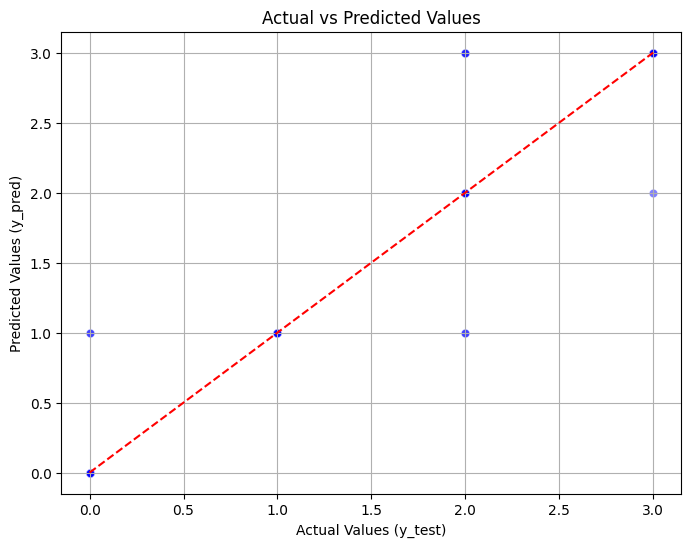

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line for reference
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [75]:
# Save best model
save_data(data_path, 'model.pkl', best_model)